# Team 19 JHB #TeamName
---
<img src="https://github.com/Lizette95/notebook_images/blob/master/banner.png?raw=true" align="left">  


---
**Markdown Cheatsheet:**
https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet

---

### Table of Contents
---
1. [Introduction](#intro)
 * Project Description
 * Datasets and Variables
---
2. [Module Imports](#imports)
---
3. [Exploratory Data Analysis](#EDA)
 * Load Data
 * Merge Datasets
 * Data Summary Statistics
 * Missing Data
 * Numerical Features
 * Categorical Features
---
4. [Data Preprocessing](#preprocessing)
---
5. [Modelling](#modelling)
---
6. [Performance Evaluation](#evaluation)
---
7. [Model Analysis](#analysis)
---
8. [Conclusion](#conclusion)

<a id="intro"></a>
## Introduction  

### Project Description

Machine learning is a powerful branch of Artificial Intelligence, dating as far back as 1952,  developed to teach computer systems how to make decisions emanated from preexisting data. Mathematical algorithms are applied to training data which allows a machine to identify patterns and make predictions for unseen datasets.

Regression is a popular supervised learning statistical method that aims to predict the value of a dependent variable (y) based on an independent variable (x). The relationship between the variables can be linear or nonlinear.

The Zindi challenge, hosted by Sendy in partnership with insight2impact facility, is to build a regression model that will predict an accurate time of arrival for motobike deliveries from the pickup point to the destination of the package. An accurate arrival time will enhance customer communication and customer experience. In addition, the solution will help businesses reduce the cost of trade through better management of resources and planning.


The dataset provided by Sendy includes order details and rider metrics based on orders made on the Sendy platform. The challenge is to predict the estimated time of arrival for orders, from pick-up to drop-off. The training dataset is a subset of over 20,000 orders and only includes direct orders (i.e. Sendy “express” orders) with bikes in Nairobi. 

### Datasets and Variables  

**train_data:** The dataset that will be used to train our model  
**test_data:** The dataset on which we will apply our model to  
**riders:** Contains unique rider Ids, number of orders, age, rating and number of ratings

**Order details**  
* Order No: Unique number identifying the order  
* User Id: Unique number identifying the customer on a platform  
* Vehicle Type: For this competition limited to bikes, however in practice, Sendy service extends to trucks and vans  
* Platform Type: Platform used to place the order (there are 4 types)  
* Personal or Business: Customer type  

**Placement times**  
* Placement: Day of Month (i.e 1-31)  
* Placement: Weekday (Monday = 1)  
* Placement: Time - Time of day the order was placed  

**Confirmation times**  
* Confirmation: Day of Month (i.e 1-31)  
* Confirmation: Weekday (Monday = 1)  
* Confirmation: Time (Time of day the order was confirmed by a rider)  

**Arrival at Pickup times**  
* Arrival at Pickup: Day of Month (i.e 1-31)  
* Arrival at Pickup: Weekday (Monday = 1)  
* Arrival at Pickup: Time (Time of day the rider arrived at the location to pick up the order - as marked by the rider through the Sendy application)  

**Pickup times**  
* Pickup: Day of Month (i.e 1-31)  
* Pickup: Weekday (Monday = 1)  
* Pickup: Time (Time of day the rider picked up the order - as marked by the rider through the Sendy application)  

**Arrival at Destination times** (not in Test set)  
* Arrival at Delivery: Day of Month (i.e 1-31)  
* Arrival at Delivery: Weekday (Monday = 1)  
* Arrival at Delivery: Time (Time of day the rider arrived at the destination to deliver the order - as marked by the rider through the Sendy application)  
* Distance covered (KM): The distance from Pickup to Destination  
* Temperature: Temperature at the time of order placement in Degrees Celsius (measured every three hours)  
* Precipitation in Millimeters: Precipitation at the time of order placement (measured every three hours)  
* Pickup Latitude and Longitude: Latitude and longitude of pick up location  
* Destination Latitude and Longitude: Latitude and longitude of delivery location  
* Rider ID: ID of the Rider who accepted the order  
* Time from Pickup to Arrival: Time in seconds between ‘Pickup’ and ‘Arrival at Destination’    

**Rider metrics**  
* Rider ID: Unique number identifying the rider (same as in order details)  
* No of Orders: Number of Orders the rider has delivered  
* Age: Number of days since the rider delivered the first order  
* Average Rating: Average rating of the rider  
* No of Ratings: Number of ratings the rider has received. Rating an order is optional for the customer

<a id="imports"></a>
## Module Imports

In [0]:
# Ignore warnings
import warnings
warnings.simplefilter(action='ignore')

# Import modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium # For Map Visualization (remember to pip install folium to your machine)
from folium.plugins import HeatMap

# Display
%matplotlib inline
sns.set_style("white")

<a id="EDA"></a>
## Exploratory Data Analysis

### Load Data

In [0]:
train_data = pd.read_csv('https://raw.githubusercontent.com/Lizette95/regression-predict-api-template/master/utils/data/Train.csv')
test_data = pd.read_csv('https://raw.githubusercontent.com/Lizette95/regression-predict-api-template/master/utils/data/Test.csv')
riders = pd.read_csv('https://raw.githubusercontent.com/Lizette95/regression-predict-api-template/master/utils/data/Riders.csv')

### Merge Datasets

In [0]:
riders.head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


In [0]:
train_data = pd.merge(train_data,riders,on='Rider Id',how='left')
train_data.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_2874,User_Id_3647,Bike,3,Business,7,3,12:53:49 PM,7,3,12:54:44 PM,7,3,1:04:52 PM,7,3,1:10:29 PM,7,3,1:21:45 PM,3,25.1,NaN,-1.272639,36.794723,-1.267448,36.807699,Rider_Id_646,676,156,587,15.0,9
1,Order_No_26860,User_Id_2763,Bike,3,Business,27,3,2:23:20 PM,27,3,2:23:38 PM,27,3,2:24:56 PM,27,3,2:38:01 PM,27,3,3:16:17 PM,14,29.0,NaN,-1.255189,36.782203,-1.301600,36.876494,Rider_Id_579,2296,2641,1250,13.3,468
2,Order_No_10343,User_Id_2884,Bike,3,Personal,3,1,12:57:09 PM,3,1,12:57:40 PM,3,1,1:09:24 PM,3,1,1:18:18 PM,3,1,1:26:09 PM,3,21.7,NaN,-1.302197,36.787426,-1.303941,36.769532,Rider_Id_146,471,191,130,13.5,31
3,Order_No_9039,User_Id_1033,Bike,3,Personal,26,2,1:18:16 PM,26,2,1:18:53 PM,26,2,1:18:56 PM,26,2,1:28:14 PM,26,2,1:50:29 PM,15,26.0,NaN,-1.222762,36.898917,-1.263194,36.797624,Rider_Id_345,1335,3036,1426,14.2,955
4,Order_No_16609,User_Id_1209,Bike,3,Business,15,1,2:04:21 PM,15,1,2:04:45 PM,15,1,2:12:57 PM,15,1,2:23:09 PM,15,1,2:30:35 PM,4,NaN,NaN,-1.307787,36.844321,-1.300406,36.829741,Rider_Id_206,446,1376,557,13.7,165


In [0]:
test_data = pd.merge(test_data,riders,on='Rider Id',how='left')
test_data.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_13098,User_Id_636,Bike,1,Personal,7,4,3:09:30 PM,7,4,3:14:41 PM,7,4,3:37:40 PM,7,4,3:54:43 PM,15,20.0,NaN,-1.224541,36.758378,-1.303473,36.798621,Rider_Id_808,228,872,14.2,90
1,Order_No_21660,User_Id_1329,Bike,3,Business,31,5,12:16:49 PM,31,5,12:22:48 PM,31,5,12:23:47 PM,31,5,12:38:24 PM,4,21.8,NaN,-1.279518,36.823809,-1.273056,36.811298,Rider_Id_812,4402,1090,14.3,1301
2,Order_No_699,User_Id_1458,Bike,1,Personal,10,1,9:53:38 AM,10,1,9:55:39 AM,10,1,10:13:07 AM,10,1,10:18:19 AM,6,17.9,NaN,-1.304365,36.781613,-1.286298,36.829397,Rider_Id_754,682,744,14.5,119
3,Order_No_25334,User_Id_1245,Bike,3,Business,25,1,2:10:20 PM,25,1,2:11:04 PM,25,1,2:11:42 PM,25,1,2:42:20 PM,17,28.1,NaN,-1.300921,36.828195,-1.319862,36.711032,Rider_Id_239,6856,2038,13.3,402
4,Order_No_4367,User_Id_1966,Bike,3,Business,20,1,11:41:44 AM,20,1,11:43:36 AM,20,1,12:19:36 PM,20,1,12:52:22 PM,21,NaN,NaN,-1.370038,36.919017,-1.291787,36.787267,Rider_Id_863,913,354,13.6,89


### Data Summary Statistics

**Train Data**

In [0]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18020 entries, 0 to 18019
Data columns (total 33 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   18020 non-null  object 
 1   User Id                                    18020 non-null  object 
 2   Vehicle Type                               18020 non-null  object 
 3   Platform Type                              18020 non-null  int64  
 4   Personal or Business                       18020 non-null  object 
 5   Placement - Day of Month                   18020 non-null  int64  
 6   Placement - Weekday (Mo = 1)               18020 non-null  int64  
 7   Placement - Time                           18020 non-null  object 
 8   Confirmation - Day of Month                18020 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            18020 non-null  int64  
 10  Confirmation - Time   

In [0]:
train_data.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
count,18020.000000,18020.000000,18020.000000,18020.000000,18020.000000,18020.000000,18020.000000,18020.000000,18020.000000,18020.000000,18020.000000,18020.000000,14284.000000,461.000000,18020.000000,18020.000000,18020.000000,18020.000000,18020.000000,18020.000000,18020.000000,18020.000000,18020.000000
mean,2.754828,15.647725,3.239512,15.647891,3.239678,15.647891,3.239678,15.647891,3.239678,15.647891,3.239678,9.481964,23.256994,7.726681,-1.281395,36.811337,-1.282438,36.811377,1550.017481,1694.923529,985.545671,13.884739,342.288180
std,0.622783,8.790259,1.567191,8.790224,1.567113,8.790224,1.567113,8.790224,1.567113,8.790224,1.567113,5.651069,3.612604,16.791592,0.030482,0.037475,0.034632,0.044511,982.573490,1578.292246,648.017519,0.911508,405.479454
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,0.100000,-1.438302,36.653621,-1.430298,36.606594,1.000000,2.000000,96.000000,0.000000,0.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,1.000000,-1.300921,36.784605,-1.301201,36.785988,881.000000,557.000000,494.000000,13.600000,61.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.500000,2.100000,-1.279395,36.807040,-1.283817,36.808223,1364.000000,1212.000000,872.000000,14.000000,161.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,26.000000,4.900000,-1.257147,36.829741,-1.260964,36.829351,2031.000000,2311.000000,1236.000000,14.300000,499.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,99.100000,-1.149010,36.991046,-1.030225,37.016779,7883.000000,9756.000000,3764.000000,15.200000,2298.000000


**Test Data**

In [0]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3181 entries, 0 to 3180
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Order No                              3181 non-null   object 
 1   User Id                               3181 non-null   object 
 2   Vehicle Type                          3181 non-null   object 
 3   Platform Type                         3181 non-null   int64  
 4   Personal or Business                  3181 non-null   object 
 5   Placement - Day of Month              3181 non-null   int64  
 6   Placement - Weekday (Mo = 1)          3181 non-null   int64  
 7   Placement - Time                      3181 non-null   object 
 8   Confirmation - Day of Month           3181 non-null   int64  
 9   Confirmation - Weekday (Mo = 1)       3181 non-null   int64  
 10  Confirmation - Time                   3181 non-null   object 
 11  Arrival at Pickup

In [0]:
test_data.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,No_Of_Orders,Age,Average_Rating,No_of_Ratings
count,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,2551.000000,91.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000
mean,2.737190,15.687520,3.243320,15.687520,3.243320,15.687520,3.243320,15.687520,3.243320,9.645709,23.269502,8.813187,-1.281894,36.810847,-1.283392,36.810331,1678.262496,980.194907,13.869947,334.149953
std,0.638466,8.849109,1.568125,8.849109,1.568125,8.849109,1.568125,8.849109,1.568125,5.768209,3.634126,18.600712,0.030652,0.037461,0.035884,0.045889,1551.715770,638.948858,0.941551,387.729980
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.300000,0.100000,-1.428932,36.666425,-1.428762,36.640266,3.000000,96.000000,0.000000,0.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.500000,1.900000,-1.300921,36.784968,-1.301543,36.784115,570.000000,497.000000,13.600000,61.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.500000,3.000000,-1.279395,36.806422,-1.285499,36.807470,1220.000000,872.000000,14.000000,161.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,26.100000,5.000000,-1.258414,36.829263,-1.261598,36.829741,2305.000000,1225.000000,14.300000,482.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,41.000000,32.100000,99.100000,-1.147170,36.963932,-1.056848,37.010923,9756.000000,3764.000000,15.200000,2255.000000


### Missing Data

**Train Data**

In [0]:
train_data.isnull().sum()

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

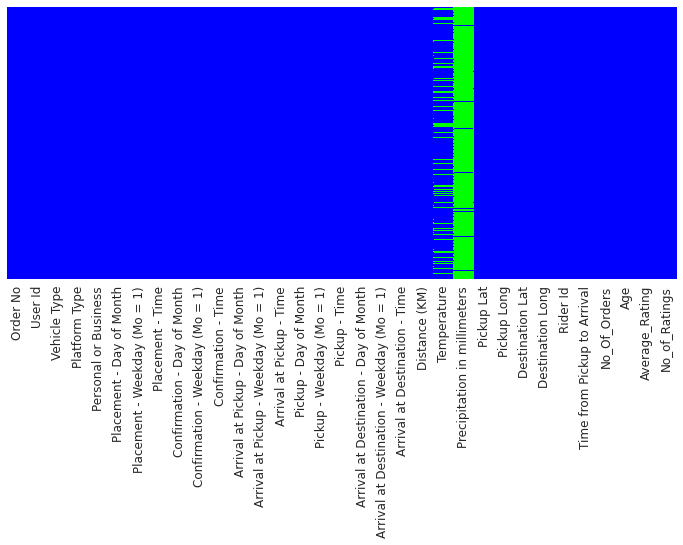

In [0]:
fig,axis = plt.subplots(figsize=(12,5))
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='brg')
plt.xticks(fontsize=12)
plt.show()

In [0]:
missing_train = pd.DataFrame(round((train_data.isnull().sum()/train_data.isnull().count())*100,2),columns=['% missing data'])
missing_train.sort_values(by='% missing data',ascending=False).head(2)

,% missing data
Precipitation in millimeters,97.44
Temperature,20.73


* Remove Precipitation in millimeters  
* Impute Temperature (average temperature according to time of order placement)

In [0]:
# Drop 'Precipitation in millimeters' column
train_data.drop('Precipitation in millimeters',axis=1,inplace=True)
# Create 24h time bins
train_data['Placement - Time(bins)'] = pd.to_datetime(pd.to_datetime(train_data['Placement - Time']).dt.strftime('%H:%M:%S')).dt.strftime('%H')
# Impute temperature for missing values
train_data['Temperature'] = train_data['Temperature'].fillna(round(train_data.groupby('Placement - Time(bins)')['Temperature'].transform('mean'),1))

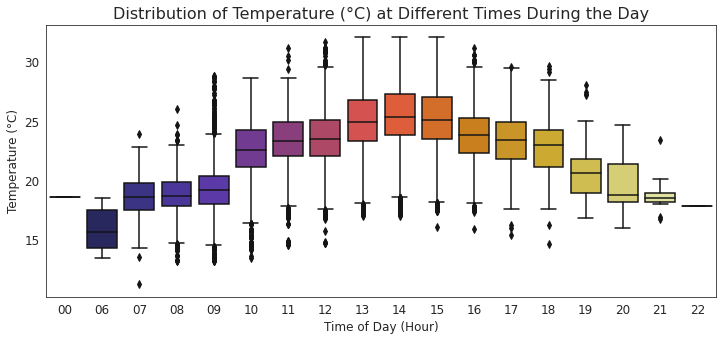

In [0]:
fig,axis = plt.subplots(figsize=(12,5))
sns.boxplot(x='Placement - Time(bins)',y='Temperature',data=train_data,palette='CMRmap')
plt.title('Distribution of Temperature (°C) at Different Times During the Day',fontsize=16)
plt.xlabel('Time of Day (Hour)',fontsize=12)
plt.ylabel('Temperature (°C)',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**Test Data**

In [0]:
test_data.isnull().sum()

Order No                                   0
User Id                                    0
Vehicle Type                               0
Platform Type                              0
Personal or Business                       0
Placement - Day of Month                   0
Placement - Weekday (Mo = 1)               0
Placement - Time                           0
Confirmation - Day of Month                0
Confirmation - Weekday (Mo = 1)            0
Confirmation - Time                        0
Arrival at Pickup - Day of Month           0
Arrival at Pickup - Weekday (Mo = 1)       0
Arrival at Pickup - Time                   0
Pickup - Day of Month                      0
Pickup - Weekday (Mo = 1)                  0
Pickup - Time                              0
Distance (KM)                              0
Temperature                              630
Precipitation in millimeters            3090
Pickup Lat                                 0
Pickup Long                                0
Destinatio

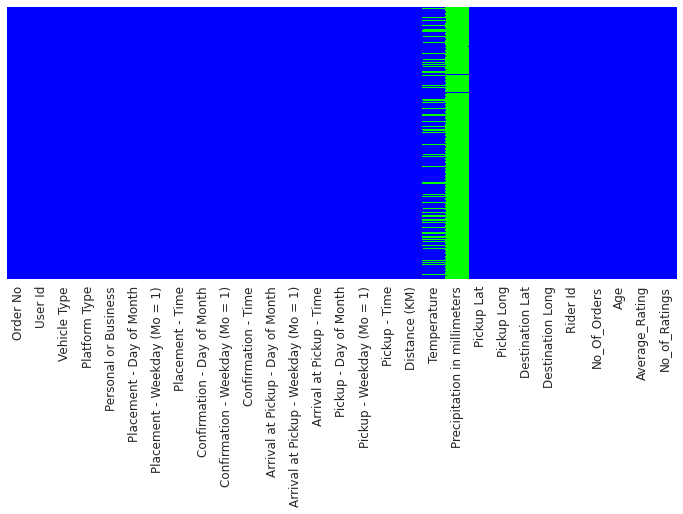

In [0]:
fig,axis = plt.subplots(figsize=(12,5))
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=False,cmap='brg')
plt.xticks(fontsize=12)
plt.show()

In [0]:
missing_test = pd.DataFrame(round((test_data.isnull().sum()/test_data.isnull().count())*100,2),columns=['% missing data'])
missing_test.sort_values(by='% missing data',ascending=False).head(2)

,% missing data
Precipitation in millimeters,97.14
Temperature,19.81


* Remove Precipitation in millimeters  
* Impute Temperature (average temperature according to time of order placement)

In [0]:
# Drop 'Precipitation in millimeters' column
test_data.drop('Precipitation in millimeters',axis=1,inplace=True)
# Create 24h time bins
test_data['Placement - Time(bins)'] = pd.to_datetime(pd.to_datetime(test_data['Placement - Time']).dt.strftime('%H:%M:%S')).dt.strftime('%H')
# Impute temperature for missing values
test_data['Temperature'] = test_data['Temperature'].fillna(round(test_data.groupby('Placement - Time(bins)')['Temperature'].transform('mean'),1))

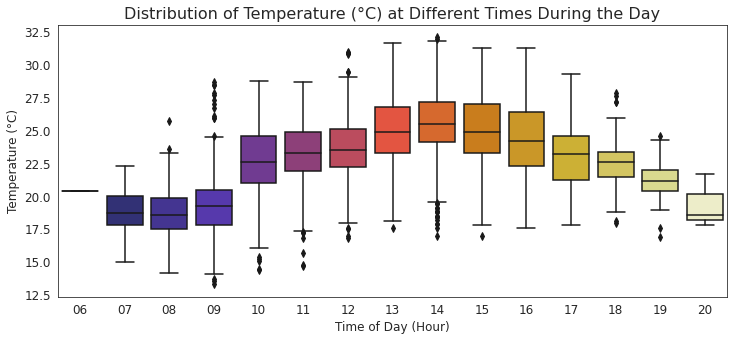

In [0]:
fig,axis = plt.subplots(figsize=(12,5))
sns.boxplot(x='Placement - Time(bins)',y='Temperature',data=test_data,palette='CMRmap')
plt.title('Distribution of Temperature (°C) at Different Times During the Day',fontsize=16)
plt.xlabel('Time of Day (Hour)',fontsize=12)
plt.ylabel('Temperature (°C)',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Numerical Features

* Placement - Time?  
* Confirmation - Time?  
* Arrival at Pickup - Time?  
* Pickup - Time?  
* Distance (KM)  
* Temperature  
* Pickup Lat  
* Pickup Long  
* Destination Lat  
* Destination Long  
* No_Of_Orders  
* Age  
* Average_Rating  
* No_of_Ratings  

**Target variable:**  

Time from Pickup to Arrival (ignore 'Arrival at Destination' columns for features)

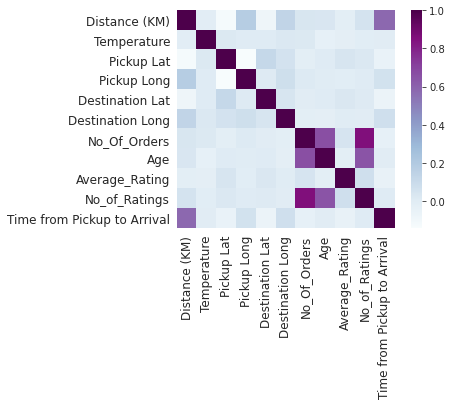

In [0]:
# Correlation of numerical variables & target variable
train_numerical = train_data[['Distance (KM)','Temperature','Pickup Lat','Pickup Long','Destination Lat','Destination Long','No_Of_Orders','Age','Average_Rating','No_of_Ratings','Time from Pickup to Arrival']]
cmatrix = train_numerical.corr()
sns.heatmap(cmatrix, square=True, cmap='BuPu')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [0]:
pd.DataFrame(cmatrix['Time from Pickup to Arrival'].abs().sort_values(ascending=False))

,Time from Pickup to Arrival
Time from Pickup to Arrival,1.000000
Distance (KM),0.582516
Destination Long,0.073346
Destination Lat,0.063081
Pickup Long,0.061748
Pickup Lat,0.054355
Average_Rating,0.044459
No_Of_Orders,0.037471
No_of_Ratings,0.008923
Age,0.002893


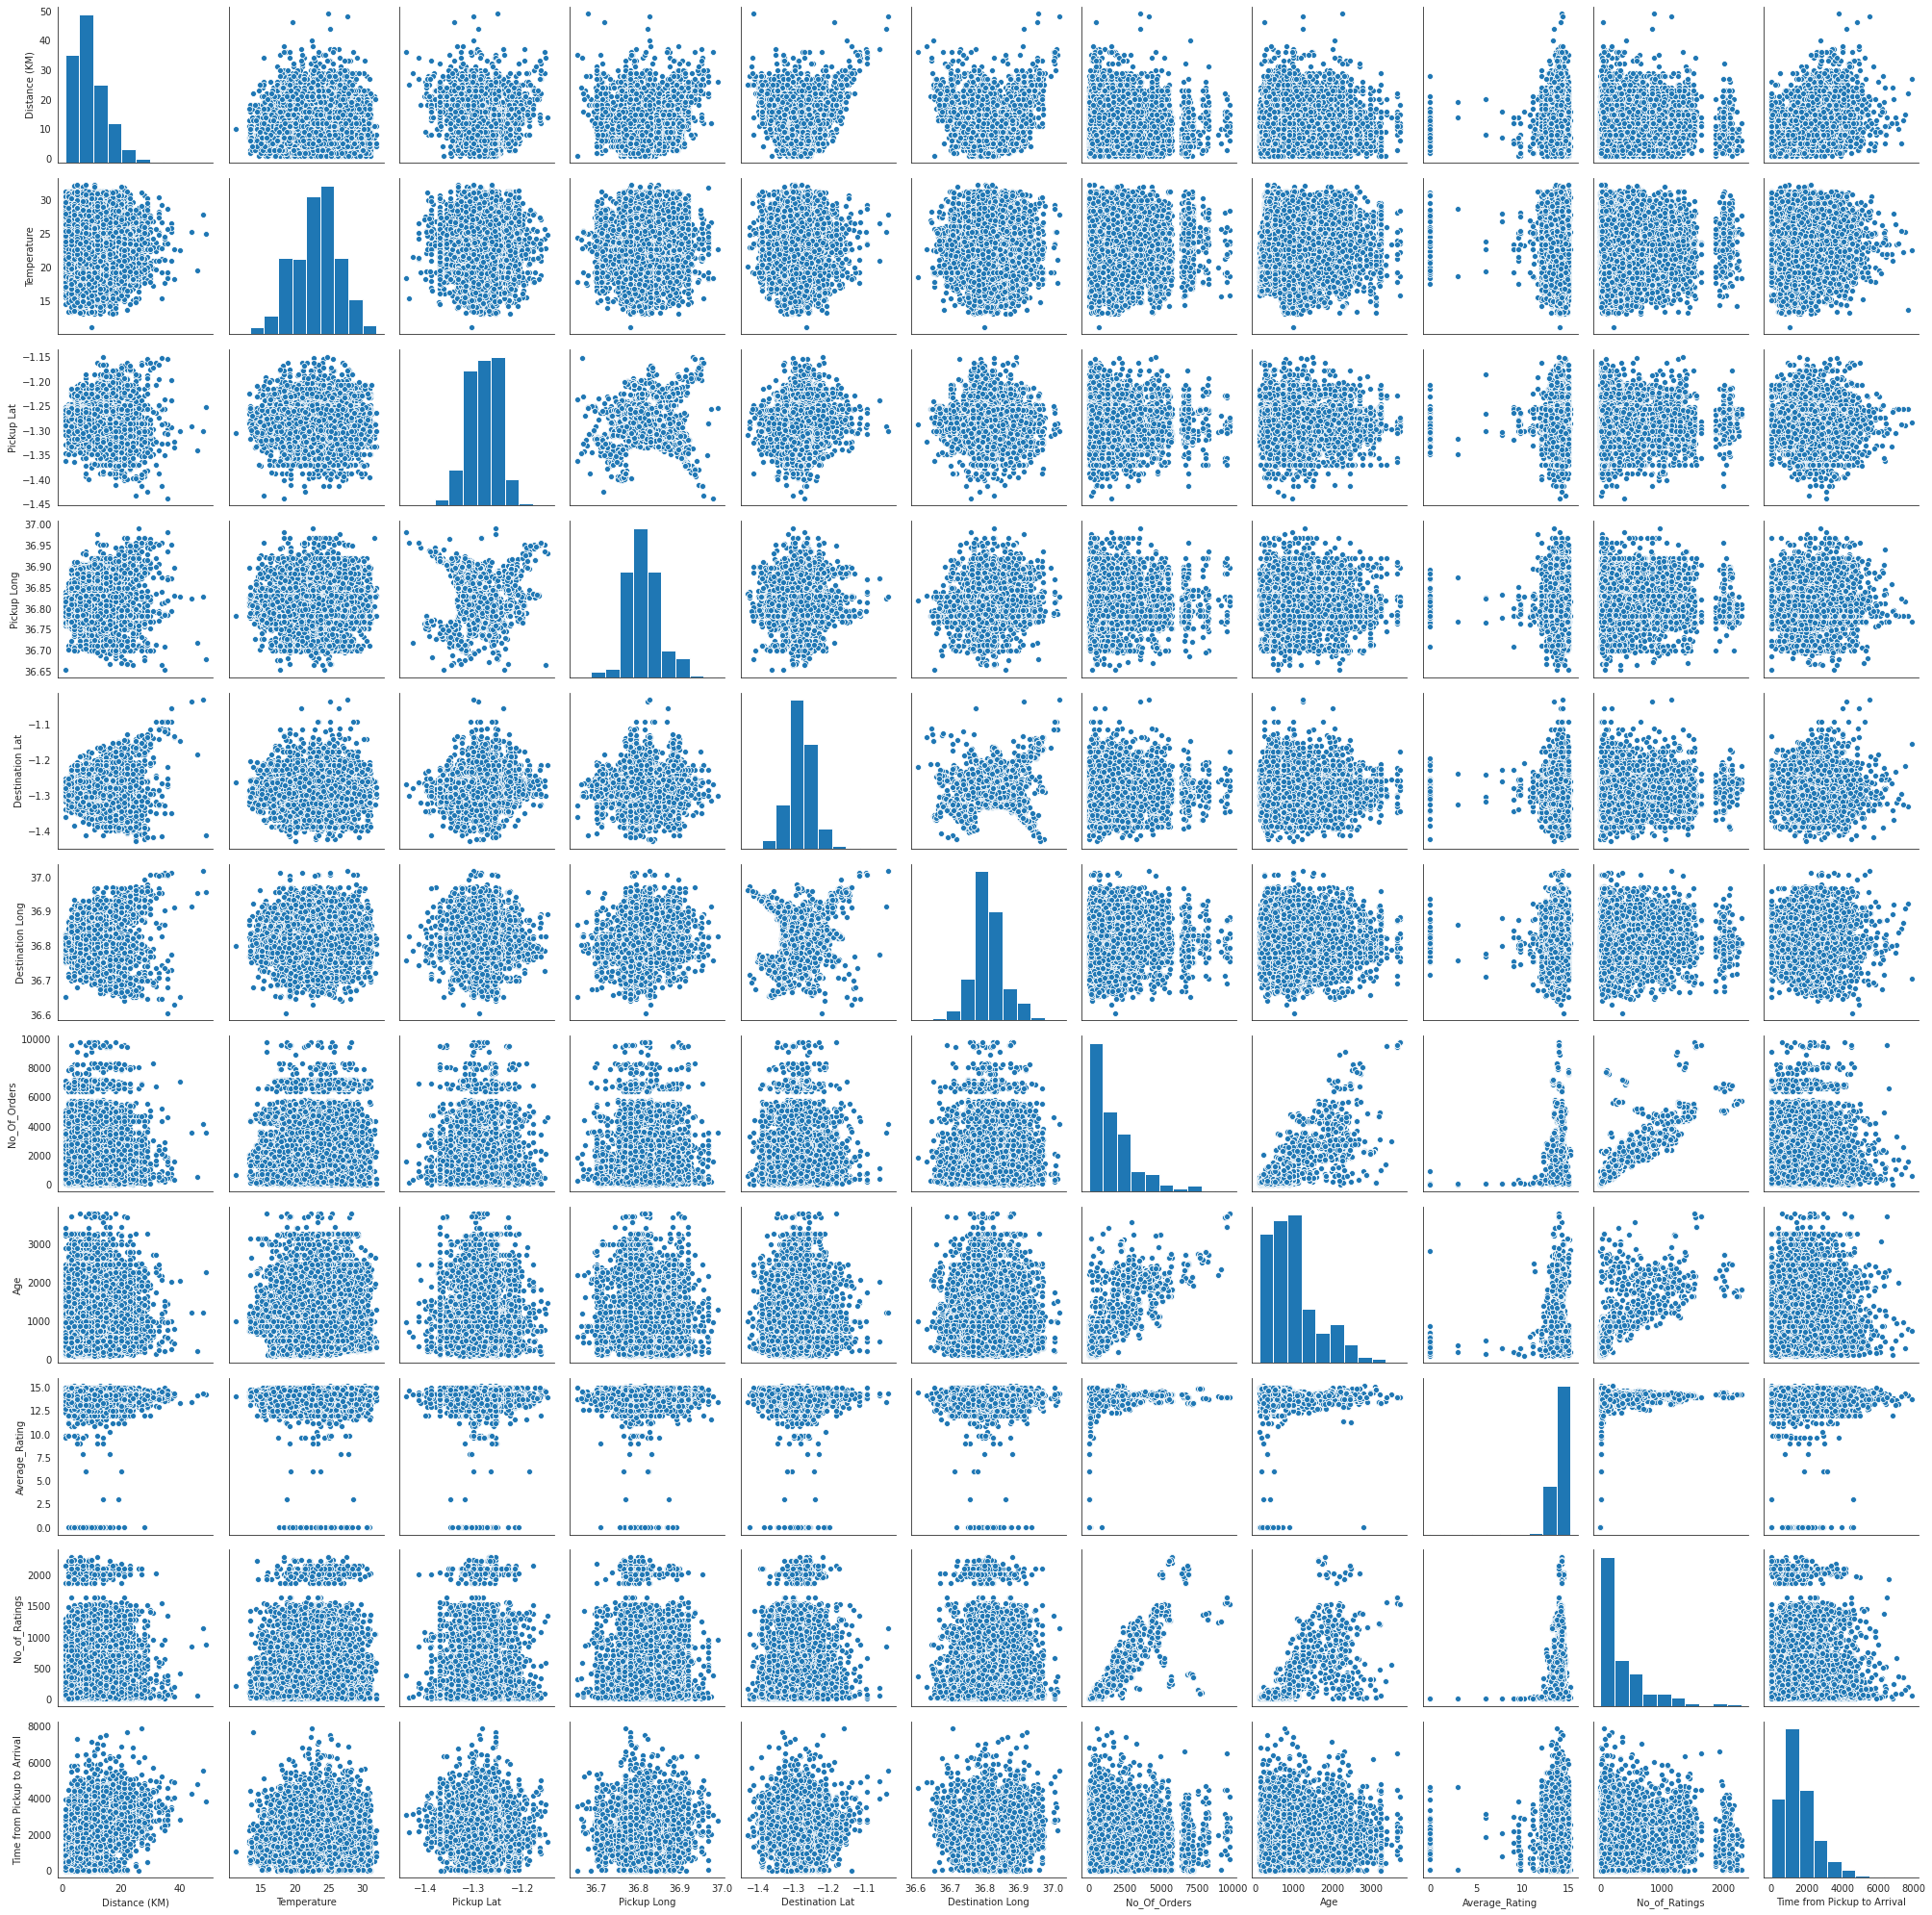

In [0]:
sns.pairplot(train_numerical)
plt.show()

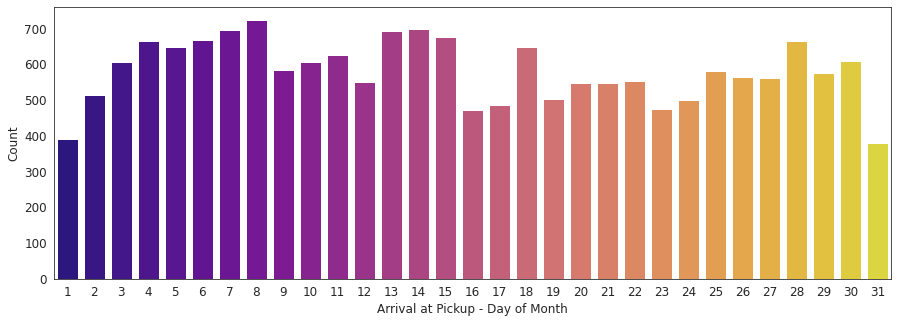

In [0]:
fig,axis = plt.subplots(figsize=(15, 5))
sns.countplot(x='Arrival at Pickup - Day of Month',data=train_data,palette='plasma')
plt.xlabel('Arrival at Pickup - Day of Month',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

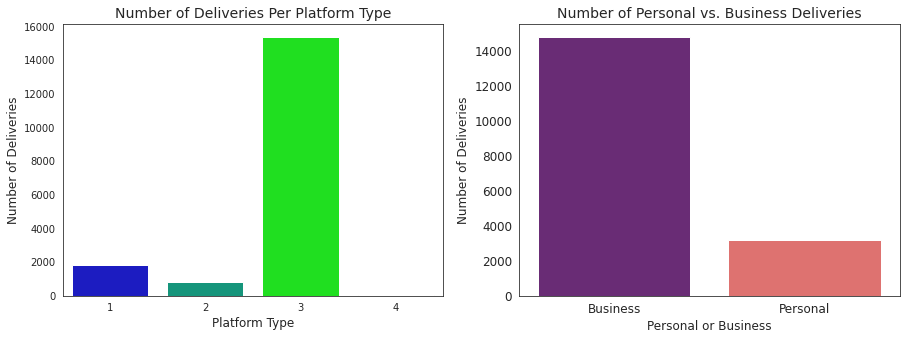

In [0]:
fig,axis = plt.subplots(ncols=2, figsize=(15, 5))
sns.countplot(x='Platform Type',data=train_data,palette='nipy_spectral',ax=axis[0])
sns.countplot(x='Personal or Business',data=train_data,palette='magma',ax=axis[1])
axis[0].set_title('Number of Deliveries Per Platform Type',fontsize=14)
axis[1].set_title('Number of Personal vs. Business Deliveries',fontsize=14)
axis[0].set_xlabel('Platform Type',fontsize=12)
axis[1].set_xlabel('Personal or Business',fontsize=12)
axis[0].set_ylabel('Number of Deliveries',fontsize=12)
axis[1].set_ylabel('Number of Deliveries',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

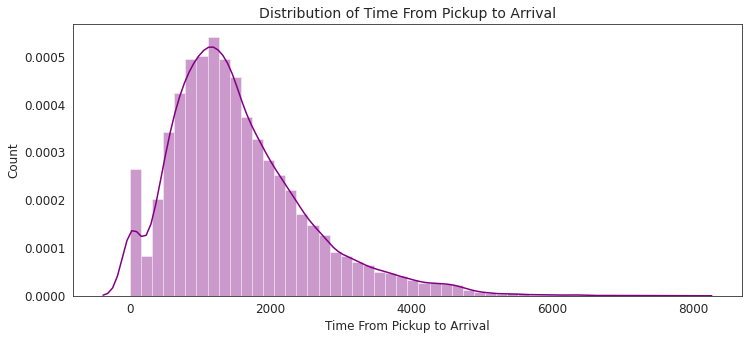

In [0]:
fig,axis = plt.subplots(figsize=(12,5))
sns.distplot(train_data['Time from Pickup to Arrival'],color='purple')
plt.title('Distribution of Time From Pickup to Arrival',fontsize=14)
plt.xlabel('Time From Pickup to Arrival',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Categorical Features

* Platform Type  
* Personal or Business  
* Placement - Day of Month  
* Placement - Weekday (Mo = 1)  
* Confirmation - Day of Month  
* Confirmation - Weekday (Mo = 1)  
* Arrival at Pickup - Day of Month  
* Arrival at Pickup - Weekday (Mo = 1)  
* Pickup - Day of Month  
* Pickup - Weekday (Mo = 1)  
* Rider Id

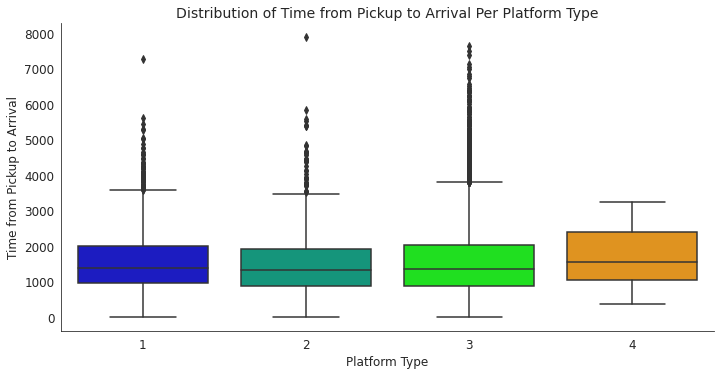

In [0]:
sns.catplot(x='Platform Type', y='Time from Pickup to Arrival',data=train_data.sort_values('Platform Type'),kind='box',height=5,aspect=2,palette='nipy_spectral')
plt.title('Distribution of Time from Pickup to Arrival Per Platform Type',fontsize=14)
plt.xlabel('Platform Type',fontsize=12)
plt.ylabel('Time from Pickup to Arrival',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<a id="preprocessing"></a>
## Data Preprocessing

In [0]:
train_data

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Placement - Time(bins)
0,Order_No_2874,User_Id_3647,Bike,3,Business,7,3,12:53:49 PM,7,3,12:54:44 PM,7,3,1:04:52 PM,7,3,1:10:29 PM,7,3,1:21:45 PM,3,25.1,-1.272639,36.794723,-1.267448,36.807699,Rider_Id_646,676,156,587,15.0,9,12
1,Order_No_26860,User_Id_2763,Bike,3,Business,27,3,2:23:20 PM,27,3,2:23:38 PM,27,3,2:24:56 PM,27,3,2:38:01 PM,27,3,3:16:17 PM,14,29.0,-1.255189,36.782203,-1.301600,36.876494,Rider_Id_579,2296,2641,1250,13.3,468,14
2,Order_No_10343,User_Id_2884,Bike,3,Personal,3,1,12:57:09 PM,3,1,12:57:40 PM,3,1,1:09:24 PM,3,1,1:18:18 PM,3,1,1:26:09 PM,3,21.7,-1.302197,36.787426,-1.303941,36.769532,Rider_Id_146,471,191,130,13.5,31,12
3,Order_No_9039,User_Id_1033,Bike,3,Personal,26,2,1:18:16 PM,26,2,1:18:53 PM,26,2,1:18:56 PM,26,2,1:28:14 PM,26,2,1:50:29 PM,15,26.0,-1.222762,36.898917,-1.263194,36.797624,Rider_Id_345,1335,3036,1426,14.2,955,13
4,Order_No_16609,User_Id_1209,Bike,3,Business,15,1,2:04:21 PM,15,1,2:04:45 PM,15,1,2:12:57 PM,15,1,2:23:09 PM,15,1,2:30:35 PM,4,25.4,-1.307787,36.844321,-1.300406,36.829741,Rider_Id_206,446,1376,557,13.7,165,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18015,Order_No_3761,User_Id_2607,Bike,2,Personal,30,6,3:09:05 PM,30,6,4:07:15 PM,30,6,4:20:48 PM,30,6,4:30:39 PM,30,6,4:50:30 PM,8,23.8,-1.291797,36.773022,-1.304119,36.819649,Rider_Id_844,1191,517,874,13.7,157,15
18016,Order_No_26033,User_Id_2956,Bike,3,Business,14,2,12:47:40 PM,14,2,12:48:29 PM,14,2,1:40:51 PM,14,2,1:50:40 PM,14,2,2:02:05 PM,6,23.5,-1.279395,36.825364,-1.258414,36.804800,Rider_Id_448,685,1220,339,14.6,119,12
18017,Order_No_18585,User_Id_867,Bike,3,Business,14,4,10:23:23 AM,14,4,10:23:32 AM,14,4,10:23:45 AM,14,4,10:38:56 AM,14,4,11:11:38 AM,15,23.7,-1.299144,36.752880,-1.322800,36.830644,Rider_Id_39,1962,7204,1909,13.3,354,10
18018,Order_No_2543,User_Id_2660,Bike,2,Personal,7,1,5:31:14 PM,7,1,5:32:19 PM,7,1,5:42:55 PM,7,1,5:47:32 PM,7,1,6:28:00 PM,15,19.8,-1.259635,36.806320,-1.326825,36.864345,Rider_Id_789,2428,4681,1908,14.1,1428,17


In [0]:
#rearranging the columns
train_data.columns = [col.replace(" ","_") for col in train_data.columns]
column_titles = [col for col in train_data.columns if col!= 'Time_from_Pickup_to_Arrival'] + ['Time_from_Pickup_to_Arrival']
train_data = train_data.reindex(columns=column_titles)
train_data.head()

,Order_No,User_Id,Vehicle_Type,Platform_Type,Personal_or_Business,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Placement_-_Time,Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),Confirmation_-_Time,Arrival_at_Pickup_-_Day_of_Month,Arrival_at_Pickup_-_Weekday_(Mo_=_1),Arrival_at_Pickup_-_Time,Pickup_-_Day_of_Month,Pickup_-_Weekday_(Mo_=_1),Pickup_-_Time,Arrival_at_Destination_-_Day_of_Month,Arrival_at_Destination_-_Weekday_(Mo_=_1),Arrival_at_Destination_-_Time,Distance_(KM),Temperature,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Placement_-_Time(bins),Time_from_Pickup_to_Arrival
0,Order_No_2874,User_Id_3647,Bike,3,Business,7,3,12:53:49 PM,7,3,12:54:44 PM,7,3,1:04:52 PM,7,3,1:10:29 PM,7,3,1:21:45 PM,3,25.1,-1.272639,36.794723,-1.267448,36.807699,Rider_Id_646,156,587,15.0,9,12,676
1,Order_No_26860,User_Id_2763,Bike,3,Business,27,3,2:23:20 PM,27,3,2:23:38 PM,27,3,2:24:56 PM,27,3,2:38:01 PM,27,3,3:16:17 PM,14,29.0,-1.255189,36.782203,-1.301600,36.876494,Rider_Id_579,2641,1250,13.3,468,14,2296
2,Order_No_10343,User_Id_2884,Bike,3,Personal,3,1,12:57:09 PM,3,1,12:57:40 PM,3,1,1:09:24 PM,3,1,1:18:18 PM,3,1,1:26:09 PM,3,21.7,-1.302197,36.787426,-1.303941,36.769532,Rider_Id_146,191,130,13.5,31,12,471
3,Order_No_9039,User_Id_1033,Bike,3,Personal,26,2,1:18:16 PM,26,2,1:18:53 PM,26,2,1:18:56 PM,26,2,1:28:14 PM,26,2,1:50:29 PM,15,26.0,-1.222762,36.898917,-1.263194,36.797624,Rider_Id_345,3036,1426,14.2,955,13,1335
4,Order_No_16609,User_Id_1209,Bike,3,Business,15,1,2:04:21 PM,15,1,2:04:45 PM,15,1,2:12:57 PM,15,1,2:23:09 PM,15,1,2:30:35 PM,4,25.4,-1.307787,36.844321,-1.300406,36.829741,Rider_Id_206,1376,557,13.7,165,14,446


In [0]:
#Function to calculate number of time in seconds (from midnight)
def time_in_seconds_train(column):
    train_data[column] = pd.to_datetime(train_data[column])
    return (train_data[column] - pd.to_datetime(pd.to_datetime('today').date())).astype('timedelta64[s]')

In [0]:
#Converting time in train dataset
train_data['Placement_-_Time'] = time_in_seconds_train('Placement_-_Time')
train_data['Confirmation_-_Time'] = time_in_seconds_train('Confirmation_-_Time')
train_data['Pickup_-_Time'] = time_in_seconds_train('Pickup_-_Time')
train_data['Arrival_at_Pickup_-_Time'] = time_in_seconds_train('Arrival_at_Pickup_-_Time')
train_data['Arrival_at_Destination_-_Time'] = time_in_seconds_train('Arrival_at_Destination_-_Time')

In [0]:
#checking how many unique items we have in each column of indepedent variables
for col_name in train_data.columns:
    if train_data[col_name].dtypes=='object':
        unique_out = len(train_data[col_name].unique())
        print(f"Feature {col_name} has {unique_out} unique catergories")

Feature Personal_or_Business has 2 unique catergories
Feature Placement_-_Time(bins) has 18 unique catergories


In [0]:
train_data.drop(['Rider_Id','Vehicle_Type','User_Id','Order_No'],axis=1,inplace=True)

In [0]:
train_data.head()

,Platform_Type,Personal_or_Business,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Placement_-_Time,Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),Confirmation_-_Time,Arrival_at_Pickup_-_Day_of_Month,Arrival_at_Pickup_-_Weekday_(Mo_=_1),Arrival_at_Pickup_-_Time,Pickup_-_Day_of_Month,Pickup_-_Weekday_(Mo_=_1),Pickup_-_Time,Arrival_at_Destination_-_Day_of_Month,Arrival_at_Destination_-_Weekday_(Mo_=_1),Arrival_at_Destination_-_Time,Distance_(KM),Temperature,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Placement_-_Time(bins),Time_from_Pickup_to_Arrival
0,3,Business,7,3,-1.589933e+09,7,3,-1.589933e+09,7,3,-1.589933e+09,7,3,-1.589933e+09,7,3,-1.589933e+09,3,25.1,-1.272639,36.794723,-1.267448,36.807699,156,587,15.0,9,12,676
1,3,Business,27,3,-1.589933e+09,27,3,-1.589933e+09,27,3,-1.589933e+09,27,3,-1.589933e+09,27,3,-1.589933e+09,14,29.0,-1.255189,36.782203,-1.301600,36.876494,2641,1250,13.3,468,14,2296
2,3,Personal,3,1,-1.589933e+09,3,1,-1.589933e+09,3,1,-1.589933e+09,3,1,-1.589933e+09,3,1,-1.589933e+09,3,21.7,-1.302197,36.787426,-1.303941,36.769532,191,130,13.5,31,12,471
3,3,Personal,26,2,-1.589933e+09,26,2,-1.589933e+09,26,2,-1.589933e+09,26,2,-1.589933e+09,26,2,-1.589933e+09,15,26.0,-1.222762,36.898917,-1.263194,36.797624,3036,1426,14.2,955,13,1335
4,3,Business,15,1,-1.589933e+09,15,1,-1.589933e+09,15,1,-1.589933e+09,15,1,-1.589933e+09,15,1,-1.589933e+09,4,25.4,-1.307787,36.844321,-1.300406,36.829741,1376,557,13.7,165,14,446


In [0]:
train_data.iloc[:,18:20]

,Temperature,Precipitation_in_millimeters
0,25.1,NaN
1,29.0,NaN
2,21.7,NaN
3,26.0,NaN
4,NaN,NaN
...,...,...
18015,23.8,NaN
18016,NaN,NaN
18017,23.7,NaN
18018,19.8,NaN


In [0]:
#Creating matrix of features
x = train_data.iloc[:, :-1].values
y = train_data.iloc[:, -1].values

In [0]:
x[:,18:19]

array([[25.1],
       [29.0],
       [21.7],
       ...,
       [23.7],
       [19.8],
       [21.6]], dtype=object)

In [0]:
#Taking care of missing values in the Temperature and Precipitation columns
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer.fit(x[:,18:19])
x[:,18:19] = imputer.transform(x[:,18:19])

In [0]:
#Encoding categorical data for train data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_personal_business = LabelEncoder()
x[:,1] = labelencoder_personal_business.fit_transform(x[:,1]) 

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [0]:
x[0]

array([0.0, 0.0, 1.0, 0.0, 0, 7, 3, 46429.0, 7, 3, 46484.0, 7, 3, 47092.0,
       7, 3, 47429.0, 7, 3, 48105.0, 3, 25.1, nan, -1.272639, 36.794723,
       -1.2674482, 36.8076994, 156, 587, 15.0, 9], dtype=object)

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [0]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train[:,5:] = sc_X.fit_transform(x_train[:,5:])
x_test[:,5:] = sc_X.transform(x_test[:,5:])

In [0]:
test_data.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Placement - Time(bins)
0,Order_No_13098,User_Id_636,Bike,1,Personal,7,4,3:09:30 PM,7,4,3:14:41 PM,7,4,3:37:40 PM,7,4,3:54:43 PM,15,20.0,-1.224541,36.758378,-1.303473,36.798621,Rider_Id_808,228,872,14.2,90,15
1,Order_No_21660,User_Id_1329,Bike,3,Business,31,5,12:16:49 PM,31,5,12:22:48 PM,31,5,12:23:47 PM,31,5,12:38:24 PM,4,21.8,-1.279518,36.823809,-1.273056,36.811298,Rider_Id_812,4402,1090,14.3,1301,12
2,Order_No_699,User_Id_1458,Bike,1,Personal,10,1,9:53:38 AM,10,1,9:55:39 AM,10,1,10:13:07 AM,10,1,10:18:19 AM,6,17.9,-1.304365,36.781613,-1.286298,36.829397,Rider_Id_754,682,744,14.5,119,09
3,Order_No_25334,User_Id_1245,Bike,3,Business,25,1,2:10:20 PM,25,1,2:11:04 PM,25,1,2:11:42 PM,25,1,2:42:20 PM,17,28.1,-1.300921,36.828195,-1.319862,36.711032,Rider_Id_239,6856,2038,13.3,402,14
4,Order_No_4367,User_Id_1966,Bike,3,Business,20,1,11:41:44 AM,20,1,11:43:36 AM,20,1,12:19:36 PM,20,1,12:52:22 PM,21,23.3,-1.370038,36.919017,-1.291787,36.787267,Rider_Id_863,913,354,13.6,89,11


In [0]:
#Function to calculate number of time in seconds (from midnight)
def time_in_seconds_test(column):
    test_data[column] = pd.to_datetime(test_data[column])
    return (test_data[column] - pd.to_datetime(pd.to_datetime('today').date())).astype('timedelta64[s]')

In [0]:
test_data.columns = [col.replace(" ","_") for col in test_data.columns]

In [0]:
#Converting time in train dataset
test_data['Placement_-_Time'] = time_in_seconds_test('Placement_-_Time')
test_data['Confirmation_-_Time'] = time_in_seconds_test('Confirmation_-_Time')
test_data['Pickup_-_Time'] = time_in_seconds_test('Pickup_-_Time')
test_data['Arrival_at_Pickup_-_Time'] = time_in_seconds_test('Arrival_at_Pickup_-_Time')

In [0]:
test_data.head()

,Order_No,User_Id,Vehicle_Type,Platform_Type,Personal_or_Business,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Placement_-_Time,Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),Confirmation_-_Time,Arrival_at_Pickup_-_Day_of_Month,Arrival_at_Pickup_-_Weekday_(Mo_=_1),Arrival_at_Pickup_-_Time,Pickup_-_Day_of_Month,Pickup_-_Weekday_(Mo_=_1),Pickup_-_Time,Distance_(KM),Temperature,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Placement_-_Time(bins)
0,Order_No_13098,User_Id_636,Bike,1,Personal,7,4,54570.0,7,4,54881.0,7,4,56260.0,7,4,57283.0,15,20.0,-1.224541,36.758378,-1.303473,36.798621,Rider_Id_808,228,872,14.2,90,15
1,Order_No_21660,User_Id_1329,Bike,3,Business,31,5,44209.0,31,5,44568.0,31,5,44627.0,31,5,45504.0,4,21.8,-1.279518,36.823809,-1.273056,36.811298,Rider_Id_812,4402,1090,14.3,1301,12
2,Order_No_699,User_Id_1458,Bike,1,Personal,10,1,35618.0,10,1,35739.0,10,1,36787.0,10,1,37099.0,6,17.9,-1.304365,36.781613,-1.286298,36.829397,Rider_Id_754,682,744,14.5,119,09
3,Order_No_25334,User_Id_1245,Bike,3,Business,25,1,51020.0,25,1,51064.0,25,1,51102.0,25,1,52940.0,17,28.1,-1.300921,36.828195,-1.319862,36.711032,Rider_Id_239,6856,2038,13.3,402,14
4,Order_No_4367,User_Id_1966,Bike,3,Business,20,1,42104.0,20,1,42216.0,20,1,44376.0,20,1,46342.0,21,23.3,-1.370038,36.919017,-1.291787,36.787267,Rider_Id_863,913,354,13.6,89,11


In [0]:
#Converting time in seconds
test_data['Placement_-_Time'] = time_in_seconds_test('Placement_-_Time')
test_data['Confirmation_-_Time'] = time_in_seconds_test('Confirmation_-_Time')
test_data['Pickup_-_Time'] = time_in_seconds_test('Pickup_-_Time')
test_data['Arrival_at_Pickup_-_Time'] = time_in_seconds_test('Arrival_at_Pickup_-_Time')

In [0]:
#checking how many unique items we have in each column of indepedent variables
for col_name in test_data.columns:
    if test_data[col_name].dtypes=='object':
        unique_out = len(test_data[col_name].unique())
        print(f"Feature {col_name} has {unique_out} unique catergories")

Feature Order_No has 3181 unique catergories
Feature User_Id has 993 unique catergories
Feature Vehicle_Type has 1 unique catergories
Feature Personal_or_Business has 2 unique catergories
Feature Rider_Id has 668 unique catergories
Feature Placement_-_Time(bins) has 15 unique catergories


In [0]:
test_data.drop(['Rider_Id','Order_No','User_Id','Vehicle_Type'],axis=1,inplace=True)

In [0]:
#Create matrix of feature for independent variables
x_test_data = test_data.values

In [0]:
x_test_data[:,15:16]

array([[20.0],
       [21.8],
       [17.9],
       ...,
       [23.7],
       [18.9],
       [17.2]], dtype=object)

In [0]:
#Taking care of missing values in the Temperature and Precipitation columns
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer.fit(x_test_data[:,15:16])
x_test_data[:,15:16] = imputer.transform(x_test_data[:,15:16])

In [0]:
x_test_data[0]

array([1, 'Personal', 7, 4, -1589932800.0, 7, 4, -1589932800.0, 7, 4,
       -1589932800.0, 7, 4, -1589932800.0, 15, 20.0, -1.2245407,
       36.7583778, -1.3034735, 36.7986213, 228, 872, 14.2, 90, '15'],
      dtype=object)

In [0]:
#Encoding categorical data for train data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_personal_business = LabelEncoder()
x_test_data[:,1] = labelencoder_personal_business.fit_transform(x_test_data[:,1]) 

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
x_test_data = np.array(ct.fit_transform(x_test_data))

In [0]:
x_test_data[0]

array([1.0, 0.0, 0.0, 0.0, 1, 7, 4, -1589932800.0, 7, 4, -1589932800.0, 7,
       4, -1589932800.0, 7, 4, -1589932800.0, 15, 20.0, -1.2245407,
       36.7583778, -1.3034735, 36.7986213, 228, 872, 14.2, 90, '15'],
      dtype=object)

In [0]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_test_data[:,5:] = sc_X.fit_transform(x_test_data[:,5:])

In [0]:
x_test_data[0]

array([1.0, 0.0, 0.0, 0.0, 1, -0.9818938412684982, 0.4826141241446435,
       0.0, -0.9818938412684982, 0.4826141241446435, 0.0,
       -0.9818938412684982, 0.4826141241446435, 0.0, -0.9818938412684982,
       0.4826141241446435, 0.0, 0.9283874326810339, -0.9803476245978091,
       1.871383359017344, -1.4008716858918213, -0.5597017317356967,
       -0.2552123483341239, -0.9347655899971319, -0.1693592786789732,
       0.35059747909715583, -0.6297896748644373, 1.0451144433828083],
      dtype=object)

<a id="modelling"></a>
## Modelling

<a id="evaluation"></a>
## Performance Evaluation

<a id="analysis"></a>
## Model Analysis

<a id="conclusion"></a>
## Conclusion

Thank you and goodnight...